# Importing Dataset

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("../input/insurance/insurance.csv")
print(dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6:7].values

In [4]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [5]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

# Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])

In [7]:
X

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.str)
X = X[:, 1:]

In [9]:
X

array([['0.0', '0.0', '1.0', ..., '27.9', '0', '1'],
       ['0.0', '1.0', '0.0', ..., '33.77', '1', '0'],
       ['0.0', '1.0', '0.0', ..., '33.0', '3', '0'],
       ...,
       ['0.0', '1.0', '0.0', ..., '36.85', '0', '0'],
       ['0.0', '0.0', '1.0', ..., '25.8', '0', '0'],
       ['1.0', '0.0', '0.0', ..., '29.07', '0', '1']], dtype='<U6')

In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

# Creating the Neural Network

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
    
# Adding the input layer and the first hidden layer
model.add(Dense(units = 128, activation = 'relu'))
    
# Adding the second hidden layer
model.add(Dense(units = 64, activation = 'relu'))

# Adding the third hidden layer
    
model.add(Dense(units = 32, activation = 'relu'))
    
# Adding the output layer
model.add(Dense(units = 1, activation = 'linear'))
    
# Compiling the ANN
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    

Using TensorFlow backend.


# Evaluating the Neural Network

In [13]:
modelplot = model.fit(x = X_train, y = y_train, batch_size = 16, epochs = 150)

Epoch 1/200
1070/1070 [==============================] - 0s 389us/step - loss: 0.0700 - mean_absolute_error: 0.0700
Epoch 2/200
1070/1070 [==============================] - 0s 88us/step - loss: 0.0521 - mean_absolute_error: 0.0521
Epoch 3/200
1070/1070 [==============================] - 0s 87us/step - loss: 0.0480 - mean_absolute_error: 0.0480
Epoch 4/200
1070/1070 [==============================] - 0s 87us/step - loss: 0.0448 - mean_absolute_error: 0.0448
Epoch 5/200
1070/1070 [==============================] - 0s 89us/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 6/200
1070/1070 [==============================] - 0s 87us/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 7/200
1070/1070 [==============================] - 0s 88us/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 8/200
1070/1070 [==============================] - 0s 86us/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 9/200
1070/1070 [==============================] - 0s 86us/step - loss: 0

1070/1070 [==============================] - 0s 85us/step - loss: 0.0262 - mean_absolute_error: 0.0262
Epoch 72/200
1070/1070 [==============================] - 0s 83us/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 73/200
1070/1070 [==============================] - 0s 85us/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 74/200
1070/1070 [==============================] - 0s 85us/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 75/200
1070/1070 [==============================] - 0s 87us/step - loss: 0.0250 - mean_absolute_error: 0.0250
Epoch 76/200
1070/1070 [==============================] - 0s 86us/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 77/200
1070/1070 [==============================] - 0s 85us/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 78/200
1070/1070 [==============================] - 0s 84us/step - loss: 0.0254 - mean_absolute_error: 0.0254
Epoch 79/200
1070/1070 [==============================] - 0s 85us/step - loss: 0.0262

1070/1070 [==============================] - 0s 93us/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 142/200
1070/1070 [==============================] - 0s 152us/step - loss: 0.0245 - mean_absolute_error: 0.0245
Epoch 143/200
1070/1070 [==============================] - 0s 126us/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 144/200
1070/1070 [==============================] - 0s 124us/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 145/200
1070/1070 [==============================] - 0s 119us/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 146/200
1070/1070 [==============================] - 0s 128us/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 147/200
1070/1070 [==============================] - 0s 102us/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 148/200
1070/1070 [==============================] - 0s 124us/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 149/200
1070/1070 [==============================] - 0s 153us/ste

In [15]:
y_pred = model.predict(X_test)



In [17]:
from sklearn.metrics import mean_absolute_error 

print("Model Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')))

Model Mean Absolute Error: 0.029900386594758056


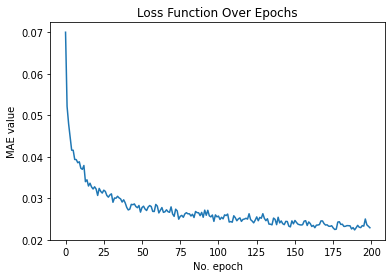

In [18]:
plt.plot(modelplot.history['mean_absolute_error'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.show()